## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
x = df.query('group=="control"& landing_page=="new_page" | group == "treatment" & landing_page=="old_page" ')
len(x)

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull()

user_id  timestamp  group  landing_page  converted
0         False      False  False         False      False
1         False      False  False         False      False
2         False      False  False         False      False
3         False      False  False         False      False
4         False      False  False         False      False
...         ...        ...    ...           ...        ...
294473    False      False  False         False      False
294474    False      False  False         False      False
294475    False      False  False         False      False
294476    False      False  False         False      False
294477    False      False  False         False      False

[294478 rows x 5 columns]

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
index = x.index

In [9]:
df2=df.drop(index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
repeated= df2[df2.duplicated(subset='user_id', keep='first')]
repeated

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [13]:
repeated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2893 to 2893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1 non-null      int64 
 1   timestamp     1 non-null      object
 2   group         1 non-null      object
 3   landing_page  1 non-null      object
 4   converted     1 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 48.0+ bytes


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset ='user_id',keep ='first',inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()*100

11.959708724499627

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
mean_control = df2.query("group == 'control'").converted.mean()
mean_control*100

12.03863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
mean_treatment = df2.query("group == 'treatment'").converted.mean()
mean_treatment*100

11.880806551510565

d. What is the probability that an individual received the new page?

In [18]:
(df2.query("landing_page == 'new_page'").count() / df2['user_id'].count()).mean()*100

50.00619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**We can notice that there is no results shows new page leads to more conversions since 12% of users who converted from old page into the new one, while 11.8% converted from new page to the old one. So there's no enough evidence**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### H0 = 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 <= 0 
Null hypothesis: difference in conversion rate between the new page and old page is zero or worse.

#### H1= 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 > 0 
Alternative hypothesis: difference in conversion rate between the new page and old page is larger than zero, that is, new page is better than old page.


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
mean_pnew = df2['converted'].mean()
print(mean_pnew*100,'%')

11.959708724499627 %


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
mean_pold = df2['converted'].mean()
print(mean_pold*100,'%')

11.959708724499627 %


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new= len(df2.query("landing_page == 'new_page'"))
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old= len(df2.query("landing_page == 'old_page'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0] , size =  n_new, p = [mean_pnew , 1-mean_pnew])
new_page_converted  = new_page_converted.mean()
print(new_page_converted*100, '%')

11.964076801321314 %


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0] , size =  n_new, p = [mean_pold , 1-mean_pold])
old_page_converted = old_page_converted.mean()
print(old_page_converted*100, '%')

11.98747505333425 %


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
difference = new_page_converted - old_page_converted
difference

-0.0002339825201293777

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0] , size =  n_new, p = [mean_pnew , 1-mean_pnew])
    old_page_converted = np.random.choice([1,0] , size =  n_new, p = [mean_pold , 1-mean_pold])
    difference = new_page_converted - old_page_converted
    p_diffs.append(difference.mean()) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([2.500e+01, 2.050e+02, 9.080e+02, 2.354e+03, 3.223e+03, 2.257e+03,
        8.260e+02, 1.810e+02, 2.000e+01, 1.000e+00]),
 array([-0.00441126, -0.0034244 , -0.00243755, -0.00145069, -0.00046384,
         0.00052302,  0.00150988,  0.00249673,  0.00348359,  0.00447044,
         0.0054573 ]),
 <a list of 10 Patch objects>)

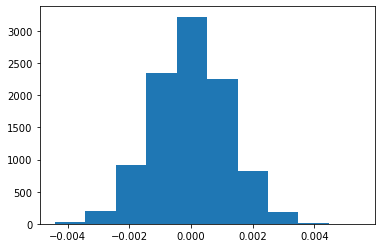

In [27]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
obs_diff1= mean_pnew - mean_pold
obs_diff1

0.0

In [29]:
p_diffs=np.array(p_diffs)

#(p_diffs>obs_diff1).mean()

obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean() 
obs_diff

-0.0015782389853555567

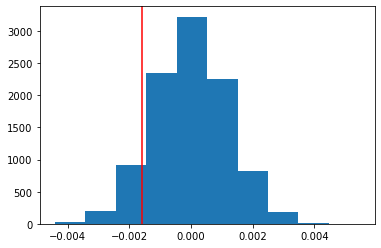

In [30]:
plt.hist(p_diffs)
plt.axvline(x = obs_diff, color = 'red')

The histogram plots above shows normal distribution and it is as what i was expecting.

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Scientific Studies is the P-Value.
We ensure in our case to accept the Null hypothesis (H0) because the Alternative Hypothesis (H1) did not satisfy the condition.** 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print('Z-score = ',z_score)
print('P-value = ', p_value)

Z-score =  1.3109241984234394
P-value =  0.9050583127590245


In [ ]:
from scipy.stats import norm
norm.ppf(1-(0.05))

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score indicates that the st.deviation is 1.3 , and 0.90 > 0.05 means that P_Value is greater than the significant difference (Alpha). Next the z-score with confidence level shows that z-score is less than confidence level which is 0.90 < 0.95 , thus we cannot accept the Alternative hypothesis and that ensures not rejecting Null Hypothesis. From here we can conclude that my findings agrees with part j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I will use Logistic Regression , because the output will be a probability either 0 or 1 (conversion , no conversion).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']

In [38]:
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   ab_page       290584 non-null  uint8 
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


In [40]:
pd.to_numeric(df2['ab_page'], downcast='integer')

0         0
1         0
2         1
3         1
4         0
         ..
294473    0
294474    0
294475    0
294476    0
294477    1
Name: ab_page, Length: 290584, dtype: int8

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df2)

In [42]:
xtrain=df2[['intercept','ab_page']]
ytrain= df2[['converted']]
log_reg = sm.OLS(ytrain,xtrain).fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sun, 10 Jan 2021   Prob (F-statistic):              0.190
Time:                        01:17:09   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P-value associated with ab_page (P>|t|) is 0.190 and that value is different from the value in Part || due to the changes in null and alterantive hypothesis , previously, our A/B testing was about "new page is better than old page" but in this part we are testing if "new page is equal to old page or not".**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**I think that considering other factors is good idea to reach approximately real results, but it is bet challengy because the other factors needs to be correlated and related to our hypothesis, by that it may shows not specific results. and also it may cause multicollinearity and for solving this issue we need to use PCA which lead us to elimenate unimportant factors or extracting and select the most important ones.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
df_countries = pd.read_csv('./countries.csv')
df_new = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [45]:
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  
user_id                                 
834778           0          1        0  
928468           0          1        1  
822059           1          1        1  
711597           0          1        0  
710616           0          1        1

In [46]:
#first find the values for country feature

df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [47]:
#Second: create dummy variables and drop the CA value so our process work smoothly with this ranking matrix
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])
df_new.drop('CA', axis=1, inplace=True)

In [48]:
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  US  UK  
user_id                                         
834778           0          1        0   0   1  
928468           0          1        1   0   0  
822059           1          1        1   0   1  
711597           0          1        0   0   1  
710616           0          1        1   0   1

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
#additional columns 
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  US  UK  UK_ab_page  
user_id                                                     
834778           0          1        0   0   1           0  
928468           0          1        1   0   0           0  
822059           1          1        1   0   1           1  
711597           0          1        0   0   1           0  
710616           0          1        1   0   1           1

In [50]:
#OLS is an estimator in which the values of values of linear equation are chosen in such a way as to minimize the sum of the squares of the differences between the observed dependent variable and predicted dependent variable.
log_model = sm.OLS(df_new['converted'], df_new[['UK_ab_page','US', 'UK']])
results = log_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              converted   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):              0.036
Method:                 Least Squares   F-statistic:                              3604.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):                        0.00
Time:                        01:17:37   Log-Likelihood:                         -98467.
No. Observations:              290584   AIC:                                  1.969e+05
Df Residuals:                  290581   BIC:                                  1.970e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
UK_ab_page     0.0011      0.003      0.455      0.649      -0.004       0.006
US             0.1153      0.003     40.892      0.000       0.110       0.121
UK             0.1200      0.002     67.397      0.000       0.117       0.124
==============================================================================
Omnibus:                   119664.894   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376041.452
Skew:                           2.244   Prob(JB):                         0.00
Kurtosis:                       6.305   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**P>|t| has zero values associates with US and UK, that is, there is no impact of the countries in the conversion rates.**

In [51]:
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  US  UK  UK_ab_page  
user_id                                                     
834778           0          1        0   0   1           0  
928468           0          1        1   0   0           0  
822059           1          1        1   0   1           1  
711597           0          1        0   0   1           0  
710616           0          1        1   0   1           1

<a id='conclusions'></a>
## Conclusion

The coefficient of UK is greater than US coefficient, that can be considered that UK country has the more impact in the conversions since users in UK converts to new page more than users in US but according to our analysis, the difference in conversion rates between new and old pages is not significant. thus, we cannot reject the null hypothesis.
Also we can conclude from the whole analysis above that new page is not better than the old page. finally, I recommend the company to stay at the old page.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])